# Classification Problem
- Inspection Required or not required

In [1]:
setwd("D:/Downloads/Case Study - Quality Performance")

In [6]:
#reading the csv file
data=read.csv("Inspection_Data.csv")

In [7]:
#check few data points
head(data)

DIVISION,SUB_DIVISION,PO_NUMBER,ITEM_SEQUENCE,ITEM_NUMBER,CUSTOMER_CODE,SUPPLIER_CODE,FACTORY_CODE,PRODUCTION_COUNTRY_CODE,PRODUCT_FAMILY,...,PRODUCT_GENDER,SCHEDULE_DATE,SHIPMENT_DATE,FOB,ORDER_QUANTITY,INSPECTION_NO,INSPECTION_DATE,FIRST_INSPECTION,INSPECTION_RESULT,INSPECTOR_CODE
F1,U1,J4793,1,WKRU2291,C1,R14,T10,CHI,Accessories,...,Women,6/22/2015,6/19/2015,34566.84,924,1506-0-57959,6/17/2015,Y,Pass,U46
F1,U1,J808,1,4JRU0269,C1,R13,T22,CHI,Accessories,...,Women,2/15/2015,2/10/2015,3552.00,222,1502-0-46248,2/8/2015,Y,Pass,U36
F1,U1,J6248,1,PXRU5837,C1,R17,T23,CHI,Accessories,...,Women,9/14/2015,9/10/2015,540.72,4,1509-0-23929,9/8/2015,Y,Pass,U43
F1,U1,J3066,1,PXRU5576,C1,R17,T23,CHI,Accessories,...,Women,6/8/2015,6/2/2015,12804.56,184,1505-0-67724,5/25/2015,Y,Pass,U43
F1,U1,J2439,1,WKRU3013,C1,R3,T6,CHI,Accessories,...,Women,4/4/2015,4/13/2015,55110.00,1000,1503-0-40641,3/17/2015,Y,Pass,U42
F1,U1,J1022,1,PXRU5386,C1,R15,T4,CHI,Accessories,...,Women,2/23/2015,2/10/2015,41348.92,1069,1502-0-19007,2/3/2015,Y,Pass,U9


In [8]:
#data summary
names(data)
#summary(data)
data=data[,-c(1,3,4,5,6,10,14,15,18,19)]


[1] "DIVISION"                "SUB_DIVISION"           
 [3] "PO_NUMBER"               "ITEM_SEQUENCE"          
 [5] "ITEM_NUMBER"             "CUSTOMER_CODE"          
 [7] "SUPPLIER_CODE"           "FACTORY_CODE"           
 [9] "PRODUCTION_COUNTRY_CODE" "PRODUCT_FAMILY"         
[11] "PRODUCT_GROUP"           "PRODUCT_SUBGROUP"       
[13] "PRODUCT_GENDER"          "SCHEDULE_DATE"          
[15] "SHIPMENT_DATE"           "FOB"                    
[17] "ORDER_QUANTITY"          "INSPECTION_NO"          
[19] "INSPECTION_DATE"         "FIRST_INSPECTION"       
[21] "INSPECTION_RESULT"       "INSPECTOR_CODE"

In [13]:
names(data)
# summary(data)
nrow(data)
ncol(data)
# output metric
y=data[,11]
class(y)

[1] "SUB_DIVISION"            "SUPPLIER_CODE"          
 [3] "FACTORY_CODE"            "PRODUCTION_COUNTRY_CODE"
 [5] "PRODUCT_GROUP"           "PRODUCT_SUBGROUP"       
 [7] "PRODUCT_GENDER"          "FOB"                    
 [9] "ORDER_QUANTITY"          "FIRST_INSPECTION"       
[11] "INSPECTION_RESULT"       "INSPECTOR_CODE"

[1] 28421

[1] 12

[1] "factor"

In [14]:
# relable Y- Pass to 1 and Fail to 0
levels(y)
levels(y)<-c(0,1)
levels(y)
head(y)

[1] "Fail" "Pass"

[1] "0" "1"

[1] 1 1 1 1 1 1
Levels: 0 1

In [15]:
# Exploring the data
#summary(data)
str(data)

'data.frame':	28421 obs. of  12 variables:
 $ SUB_DIVISION           : Factor w/ 2 levels "U1","U2": 1 1 1 1 1 1 1 1 1 1 ...
 $ SUPPLIER_CODE          : Factor w/ 20 levels "R1","R10","R11",..: 6 5 9 9 14 7 7 7 9 6 ...
 $ FACTORY_CODE           : Factor w/ 34 levels "T1","T10","T11",..: 2 15 16 16 31 29 29 29 18 22 ...
 $ PRODUCTION_COUNTRY_CODE: Factor w/ 5 levels "BAN","CHI","INA",..: 2 2 2 2 2 2 2 2 2 5 ...
 $ PRODUCT_GROUP          : Factor w/ 2 levels "Bags","Handbag": 1 1 1 1 1 1 1 1 1 1 ...
 $ PRODUCT_SUBGROUP       : Factor w/ 8 levels "Audio / Visual Equipment Bag",..: 6 4 6 6 6 6 6 6 6 6 ...
 $ PRODUCT_GENDER         : Factor w/ 3 levels "Men","Unisex",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ FOB                    : num  34567 3552 541 12805 55110 ...
 $ ORDER_QUANTITY         : int  924 222 4 184 1000 1069 263 550 27 24 ...
 $ FIRST_INSPECTION       : Factor w/ 2 levels "N","Y": 2 2 2 2 2 2 2 2 2 2 ...
 $ INSPECTION_RESULT      : Factor w/ 2 levels "Fail","Pass": 2 2 2 2 2 2 2 2 2 2 

In [16]:
# Import tree library
library(tree)

In [24]:
# tree() function to fit a classification tree 
data=data[,-c(3,12)]
tree.data=tree(INSPECTION_RESULT~.,data)
summary(tree.data)


Classification tree:
tree(formula = INSPECTION_RESULT ~ ., data = data)
Variables actually used in tree construction:
[1] "SUPPLIER_CODE"           "PRODUCTION_COUNTRY_CODE"
Number of terminal nodes:  5 
Residual mean deviance:  0.2715 = 7714 / 28420 
Misclassification error rate: 0.04201 = 1194 / 28421 

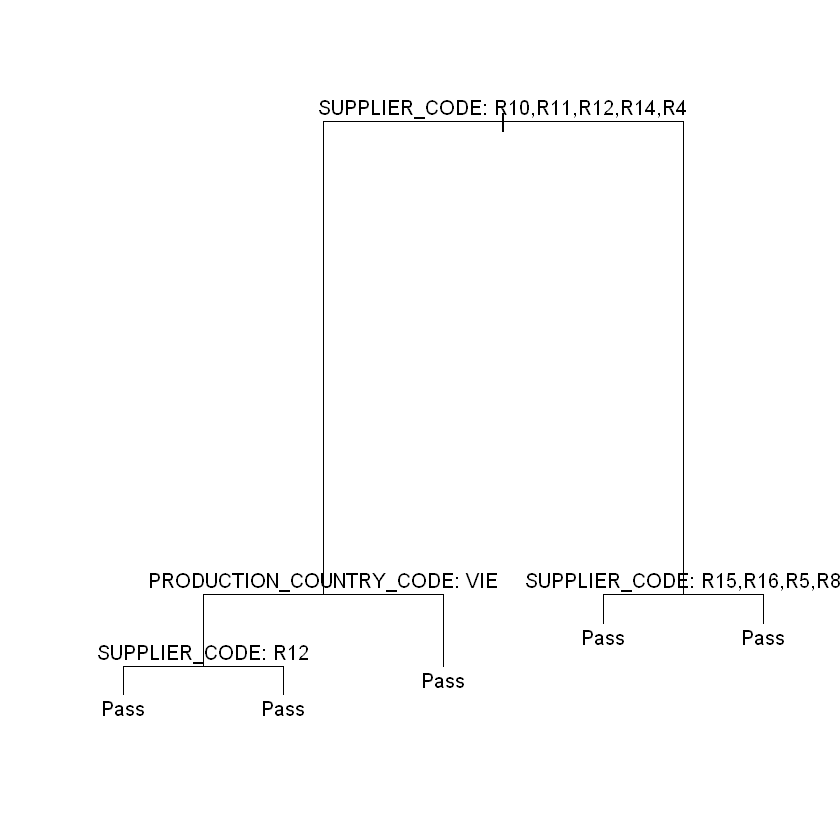

In [25]:
plot(tree.data)
text(tree.data,pretty=0)

In [29]:
# spltting training and test data
set.seed(2)
train=sample(1:nrow(data),14000)
data.test=data[-train,]
y.test=data$INSPECTION_RESULT[-train]
tree.data=tree(INSPECTION_RESULT~.,data, subset=train)
tree.pred=predict(tree.data, data.test, type='class')
table(tree.pred, y.test)

         y.test
tree.pred  Fail  Pass
     Fail     0     0
     Pass   632 13789

In [31]:
13789/nrow(data)

[1] 0.4851694

In [ ]:
# visually look at the dataset
library(ggplot2)
qplot(PRODUCT_SUBGROUP  ,ORDER_QUANTITY,colour=INSPECTION_RESULT,data=data)

In [5]:
# importing the library
library(rpart)
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.3"

In [6]:
#create training and validation sets
train.flag <- createDataPartition(y=data$INSPECTION_RESULT,p=0.5,list=FALSE)
training <- data[train.flag,]
Validation <- data[-train.flag,]

## Building a CART model 

In [7]:
modfit <- train(INSPECTION_RESULT~.,method="rpart",data=training) 
summary(modfit)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [ ]:
library(rattle)
fancyRpartPlot(modfit$finalModel)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
Warning message:
"package 'rattle' was built under R version 3.4.3"Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE

If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dyna

IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN
Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gt

In [19]:
#grow tree
fit<-rpart(y_train~.,data=X, method="class")
summary(fit)

Call:
rpart(formula = y_train ~ ., data = X, method = "class")
  n= 28421 

    CP nsplit rel error xerror       xstd
1 1.00      0         1      1 0.02832553
2 0.01      1         0      0 0.00000000

Variable importance
INSPECTION_RESULT 
              100 

Node number 1: 28421 observations,    complexity param=1
  predicted class=Pass  expected loss=0.04201119  P(node) =1
    class counts:  1194 27227
   probabilities: 0.042 0.958 
  left son=2 (1194 obs) right son=3 (27227 obs)
  Primary splits:
      INSPECTION_RESULT       splits as  LR, improve=2287.6770, (0 missing)
      INSPECTOR_CODE          splits as  RRRRRRRRLLRRRRRRLLRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR, improve= 250.9004, (0 missing)
      FACTORY_CODE            splits as  RRRRRRRRRRRRRRRRRRLRRRRRRRRRRLRRRR, improve= 197.6064, (0 missing)
      PRODUCTION_COUNTRY_CODE splits as  RRRRL, improve= 165.6825, (0 missing)
      SUPPLIER_CODE           splits as  RLRRRLRRRRRRRRRRRRRR, improve= 151.5572, (0 missing)

Node number

In [ ]:
#predict output
predicted=predict(fit,x_test)

In [ ]:
#split train test data

In [22]:
#random forest codes
library(randomForest)
#fitting model
random.fit<-randomForest(y~.,X,ntree=500)
summary(random.fit)

                Length Class  Mode     
call                4  -none- call     
type                1  -none- character
predicted       28421  factor numeric  
err.rate         1500  -none- numeric  
confusion           6  -none- numeric  
votes           56842  matrix numeric  
oob.times       28421  -none- numeric  
classes             2  -none- character
importance         12  -none- numeric  
importanceSD        0  -none- NULL     
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y               28421  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

In [ ]:
#Predict Output 
predicted= predict(fit,x_test)

# GBM in R
GBM Algorithm for two classes
1. Initialize the outcome
2. Iterate from 1 to total number of trees
  2.1 Update the weights for targets based on previous run (higher for the ones mis-classified)
  2.2 Fit the model on selected subsample of data
  2.3 Make predictions on the full set of observations
  2.4 Update the output with current results taking into account the learning rate
3. Return the final output.

In [ ]:
# GBM in R (with cross validation)
library(caret)
fitControl <- trainControl(method = "cv",
                           number = 10, #5folds)
tune_Grid <-  expand.grid(interaction.depth = 2,
                            n.trees = 500,
                            shrinkage = 0.1,
                            n.minobsinnode = 10)
set.seed(825)
 fit <- train(y_train ~ ., data = train,
                 method = "gbm",
                 trControl = fitControl,
                 verbose = FALSE,
                 tuneGrid = gbmGrid)
predicted= predict(fit,test,type= "prob")[,2] 